In [1]:
import nltk


In [2]:
#nltk.download_shell()

In [3]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
import pandas as pd

In [6]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [7]:
for messNO,messages in enumerate(messages[:10]):
    print(messNO,messages)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [8]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [9]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [12]:
messages['length']=messages['message'].apply(len)

In [13]:
messages.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [14]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

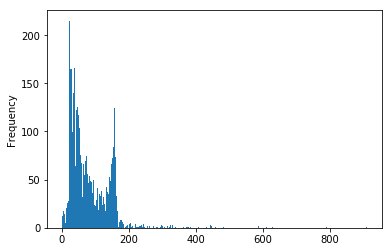

In [16]:
messages['length'].plot.hist(bins=500)

In [17]:
import string

In [18]:
mess = 'sample string !, for checkiing punctuations'

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
nopunc = [c for c in mess if c not in string.punctuation]

In [21]:
nopunc=''.join(nopunc)
nopunc.split()

['sample', 'string', 'for', 'checkiing', 'punctuations']

In [22]:
from nltk.corpus import stopwords

In [23]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [24]:
clean_mess

['sample', 'string', 'checkiing', 'punctuations']

In [25]:
def text_process(messages):
    nopunc= [c for c in messages if c not in string.punctuation]
    nopunc=''.join(nopunc)
    clean_messages = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_messages

In [26]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
transformation_bow= CountVectorizer(analyzer=text_process).fit(messages['message'])

In [30]:
mess3=messages['message'][3]

mess3

In [31]:
print(len(transformation_bow.vocabulary_))

11425


In [32]:
bow3 = transformation_bow.transform([mess3])

In [33]:
bow3.shape

(1, 11425)

In [34]:
print(bow3)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [35]:
print(transformation_bow.get_feature_names())

['0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796XXXXXX', '07973788240', '07XXXXXXXXX', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p',

In [36]:
mess_transform=transformation_bow.transform(messages['message'])

In [37]:

print(mess_transform.shape)

(5572, 11425)


In [38]:
mess_transform.nnz

50548

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer

In [55]:
Tfidf_Transformer=TfidfTransformer().fit(mess_transform)

In [58]:
Tfidf3=Tfidf_Transformer.transform(mess_transform)

In [59]:
print(Tfidf3)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

In [53]:
from sklearn.naive_bayes import MultinomialNB

In [60]:
spam_detect_model= MultinomialNB().fit(Tfidf3,messages['label'])

In [64]:
all_pred=spam_detect_model.predict(Tfidf3)

In [65]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [66]:
from sklearn.cross_validation import train_test_split

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [67]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['label'])

In [69]:
msg_train

1875    Would you like to see my XXX pics they are so ...
482     Yo carlos, a few friends are already asking me...
3923    Oh really? perform, write a paper, go to a mov...
4208                   Lets use it next week, princess :)
845                              K.k:)when are you going?
5518    By the way, i've put a skip right outside the ...
1346      Que pases un buen tiempo or something like that
2027    Nah man, my car is meant to be crammed full of...
5435                    I'm wif him now buying tix lar...
3005    You've won tkts to the EURO2004 CUP FINAL or £...
1240    Hope you are having a great new semester. Do w...
323     cud u tell ppl im gona b a bit l8 cos 2 buses ...
781     Your opinion about me? 1. Over 2. Jada 3. Kusr...
299     I cant pick the phone right now. Pls send a me...
839     We tried to contact you re our offer of New Vi...
1224       Rofl betta invest in some  anti aging products
4542    Hiya. How was last night? I've been naughty an...
651     Thats 

In [77]:
from sklearn.pipeline import Pipeline

In [78]:
pipeline = Pipeline([
        ('bow',CountVectorizer(analyzer=text_process)),
        ('Tfidf',TfidfTransformer()),
        ('classifier',MultinomialNB())
    ])

In [79]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x00000295475D47B8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [80]:
from sklearn.metrics import classification_report

In [83]:
predictions=pipeline.predict(msg_test)

In [85]:
print(classification_report(label_test,predictions))

             precision    recall  f1-score   support

        ham       0.97      1.00      0.98      1215
       spam       1.00      0.75      0.86       178

avg / total       0.97      0.97      0.97      1393

